# EDA Case Study: Employee Productivity and Satisfaction HR Data

#### -Mayank Srivastava

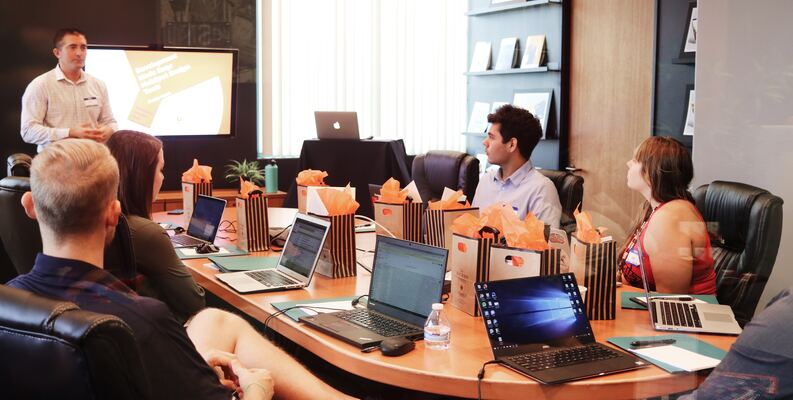

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
#importing the dataset
df=pd.read_csv('hr_dashboard_data.csv')
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [3]:
# checking the shape of the dataset
df.shape

(200, 11)

In [4]:
# checking the missing values
pd.DataFrame({'Missing val': df.isna().sum(),'Missing val %':round(df.isna().sum()*100/len(df),2)})

,Missing val,Missing val %
Name,0,0.0
Age,0,0.0
Gender,0,0.0
Projects Completed,0,0.0
Productivity (%),0,0.0
Satisfaction Rate (%),0,0.0
Feedback Score,0,0.0
Department,0,0.0
Position,0,0.0
Joining Date,0,0.0


In [5]:
# checking the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [6]:
# Feature-wise summary

for cols in df.columns:
    if cols not in ['Name', 'Salary']:
        print(cols)
        print(df[cols].nunique())
        print(df[cols].unique())
        print('-'*50)

Age
35
[25 59 30 26 43 24 33 23 39 36 42 32 29 40 46 41 27 45 35 34 58 44 28 31
 38 47 22 51 57 49 50 54 55 48 60]
--------------------------------------------------
Gender
2
['Male' 'Female']
--------------------------------------------------
Projects Completed
26
[11 19  8  1 14  5 13  4  7 17  2 18 15 12 10  3 22  9 23 16 20  6  0 25
 24 21]
--------------------------------------------------
Productivity (%)
82
[57 55 87 53  3 63 41 92 32 10 45  9 15 88 44 22  1 29 46 76 18 26  0 84
 86 93 95 37 47 77 23 58 14 61 90 33 16 42 60 70 81 75 13 68 74 39 20 48
 28 40 65 31 30 96  5  2 50 89 38 94 54 56 80 67  7 52 11 35 71 19 51 98
 43 66 59 79 27 69 97 34 85 36]
--------------------------------------------------
Satisfaction Rate (%)
94
[ 25  76  10   4   9  33  39  68  43  15  67  31  97  20   8  53  37  36
  66  17  73  80  26  13  52  81  69  51  94  99 100  35  56  47  72  89
  48  75  59  71  85  38  45  60  95  27  61  62  88  64  40  63  83   7
  18   6  79   3  50   1  87   0  46

In [7]:
df.describe(include= 'all')

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
count,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200,200,200,200.000000
unique,200,NaN,2,NaN,NaN,NaN,NaN,5,6,25,NaN
top,Douglas Lindsey,NaN,Male,NaN,NaN,NaN,NaN,Sales,Manager,Jan-18,NaN
freq,1,NaN,100,NaN,NaN,NaN,NaN,47,40,23,NaN
mean,NaN,34.650000,NaN,11.455000,46.755000,49.935000,2.883000,NaN,NaN,NaN,76619.245000
std,NaN,9.797318,NaN,6.408849,28.530068,28.934353,1.123263,NaN,NaN,NaN,27082.299202
min,NaN,22.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,30231.000000
25%,NaN,26.000000,NaN,6.000000,23.000000,25.750000,1.900000,NaN,NaN,NaN,53080.500000
50%,NaN,32.000000,NaN,11.000000,45.000000,50.500000,2.800000,NaN,NaN,NaN,80540.000000
75%,NaN,41.000000,NaN,17.000000,70.000000,75.250000,3.900000,NaN,NaN,NaN,101108.250000


Observations:
1. Dataset has 200 rows and 11 columns. There are no missing values.
2. The data set contains data of 200 employees, has a 50-50 Gender Distribution, covering 5 Departments and 6 Positions.
3. The avg age of employees is 34.6 and it varies from 22 to 60 years.
3. Salary ranges from 30231-119895 with an avg salary of 76619.24
4. Maximum no. of employees are either form the Sales Dept or at Manager position.


#### Feature Engineering: Adding  a column: 'Year of Experience'

In [8]:
df['Year']=df['Joining Date'].str.split('-').str[1].astype(int)

In [9]:
# converting Years to actual Years of experience as of year 2024
a=lambda x: (2024 - (1900+x)) if x>24 else 24-x
df.Year = np.array(map(a,df.Year))

In [10]:
# changing Year to int and dropping Joining Date
df.Year=df.Year.astype('int')
df.drop('Joining Date',axis =1, inplace=  True)

In [11]:
# emplployee count
df.Name.nunique()

200

***The data set contains record of 200 employee.***

Department
Sales        47
Marketing    42
Finance      41
IT           38
HR           32
Name: count, dtype: int64

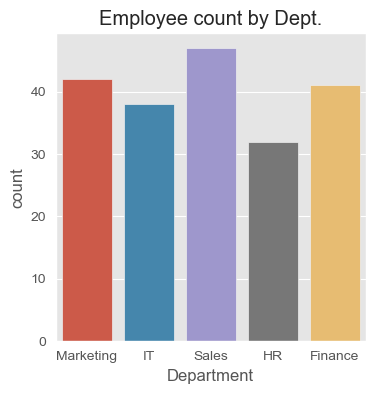

In [12]:
# No. of employee in each Dept.

plt.figure(figsize =(4,4))
sns.countplot(x=df.Department)
plt.title('Employee count by Dept.')

df.Department.value_counts()

In [13]:
#avg age of employee in each dept.
round(df.groupby('Department')['Age'].mean(),1)

Department
Finance      35.2
HR           34.7
IT           35.6
Marketing    34.1
Sales        33.9
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

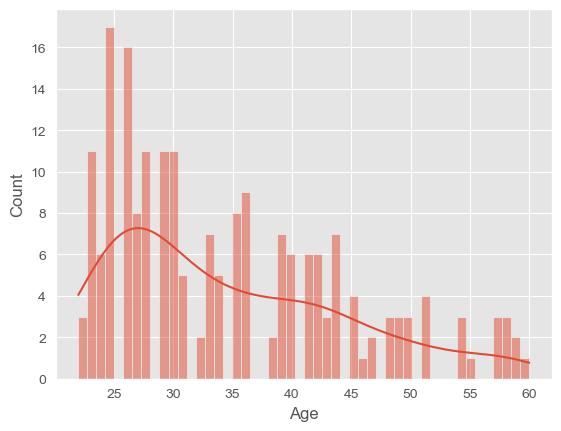

In [14]:
#histogram of employee age
#plt.figure(figsize =(8,4))
sns.histplot(x=df.Age, bins =50, kde= True)

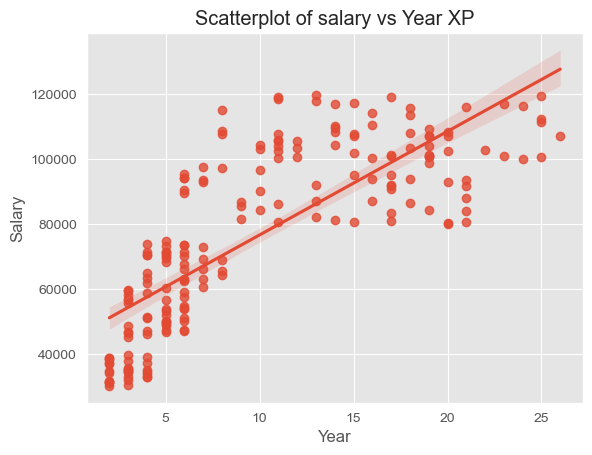

In [15]:
# Scatterplot of salary vs Year XP
sns.regplot(x=df.Year, y=df.Salary)
plt.title('Scatterplot of salary vs Year XP')
plt.show()

***The salary increases as the Years of experience increase, and the Regression line proves the same.***

Department
Finance      42.27
HR           48.12
IT           56.34
Marketing    44.26
Sales        44.21
Name: Productivity (%), dtype: float64

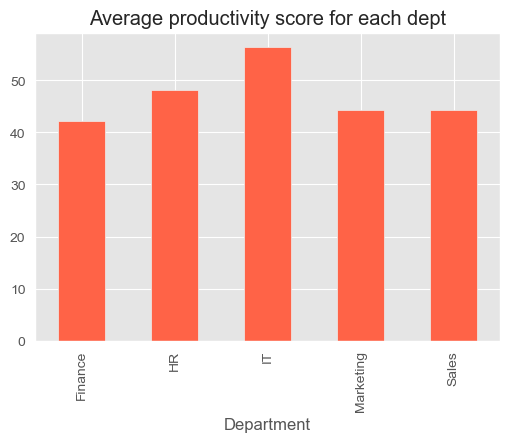

In [16]:
# Let's check the Average productivity score for each dept.
round(df.groupby('Department')['Productivity (%)'].mean(),2).plot(kind = 'bar', figsize =(6,4), color= 'tomato')
plt.title('Average productivity score for each dept')
round(df.groupby('Department')['Productivity (%)'].mean(),2)

***The IT dept has shown maximum productivity, followed by HR Dept***

<Axes: xlabel='Productivity (%)', ylabel='Satisfaction Rate (%)'>

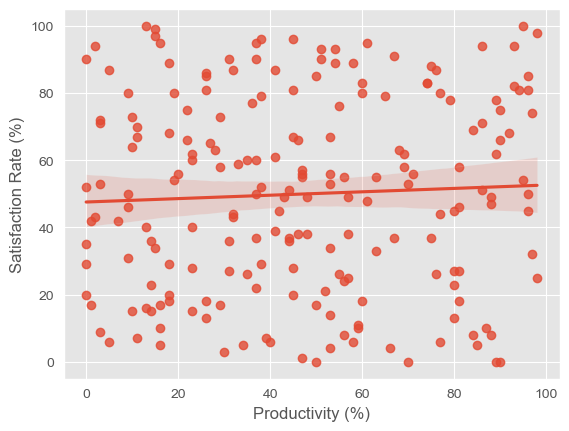

In [17]:
# Lets check the relation b/w Productivity% and Satisfaction%
sns.regplot(x='Productivity (%)',y ='Satisfaction Rate (%)', data=df)

***Clearly there is no correlation b/w 'Productivity (%)', 'Satisfaction Rate (%)'***

<Axes: xlabel='Satisfaction Rate (%)', ylabel='Count'>

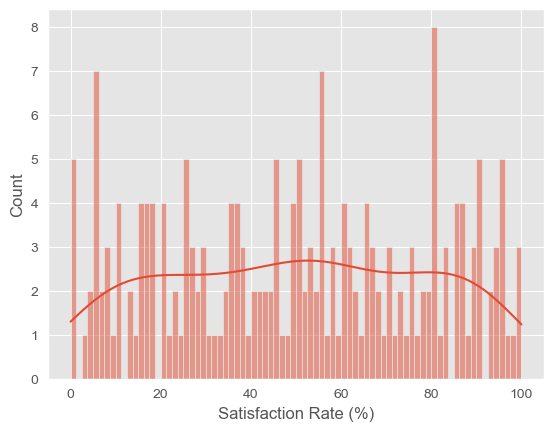

In [18]:
# Explore the distribution of satisfaction scores. 
sns.histplot(x=df['Satisfaction Rate (%)'], bins =80, kde = True)

In [19]:
df['Satisfaction Rate (%)'].describe()

count    200.000000
mean      49.935000
std       28.934353
min        0.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: Satisfaction Rate (%), dtype: float64

***After looking at the values of the Mean, Median and Quartiles, it can be said that there is no skew-ness in the data, it shows an almost uniform distribution***

Department
Finance      50.048780
HR           51.625000
IT           54.342105
Marketing    46.023810
Sales        48.617021
Name: Satisfaction Rate (%), dtype: float64 

Position
Analyst             39.787879
Intern              55.266667
Junior Developer    54.057143
Manager             55.575000
Senior Developer    50.400000
Team Lead           43.406250
Name: Satisfaction Rate (%), dtype: float64


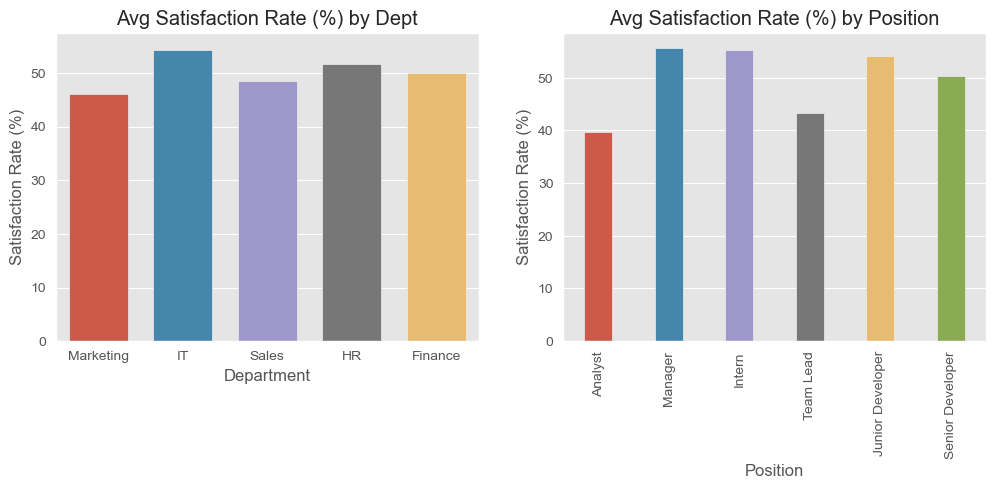

In [20]:
#Lets check the satisfaction rate acorss different postions and dept.
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Department, y=df['Satisfaction Rate (%)'], ci=0, width =0.7)
plt.title('Avg Satisfaction Rate (%) by Dept')
plt.subplot(1,2,2)
sns.barplot(x=df.Position, y=df['Satisfaction Rate (%)'], ci=0, width =0.4)
plt.title('Avg Satisfaction Rate (%) by Position')
plt.xticks(rotation =90)
print(df.groupby("Department")['Satisfaction Rate (%)'].mean(),"\n")
print(df.groupby("Position")['Satisfaction Rate (%)'].mean())
plt.show()


Observations:
    1. Highest avg Satisfaction % is seen in IT Dept then HR. Minimum Satisfaction % can be seen in marketing Dept.
    2. Highest avg Satisfaction % is seen in Managers, Interns and Junion Developers. Minimum Satifaction is seen in Analyst position.


In [21]:
## Lets check all the numerical columns for outliers, using Descriptive Stats and Boxplot

In [22]:
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Year
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000,9.970000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202,6.701016
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000,2.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000,4.000000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000,7.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000,16.000000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000,26.000000


Text(0.5, 1.0, 'Boxplot of Salary')

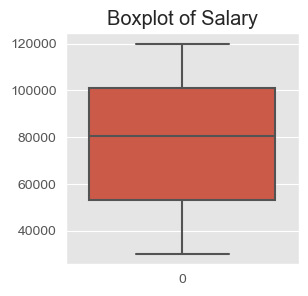

In [23]:
#Are there any outliers in the dataset? Identify and handle them if necessary.
plt.figure(figsize =(3,3))
sns.boxplot(df.Salary)
plt.title('Boxplot of Salary')

Text(0.5, 1.0, 'Boxplot of other numerical columns')

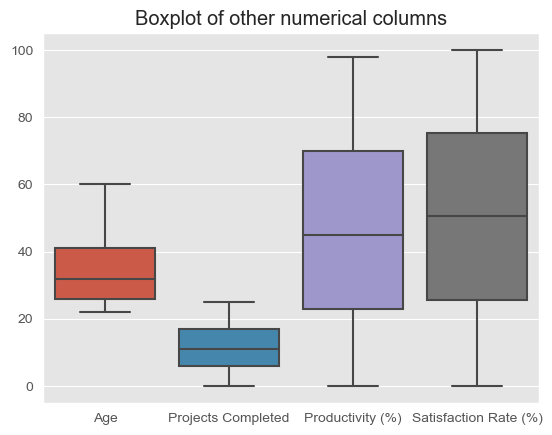

In [24]:
sns.boxplot(df[['Age','Projects Completed','Productivity (%)','Satisfaction Rate (%)']])
plt.title('Boxplot of other numerical columns')


***Clearly, there are no Outliers in the dataset***

In [25]:
# Calculate the average salary for each age group say ,20-30, 30-40,...

In [26]:
df.Age.describe()

count    200.000000
mean      34.650000
std        9.797318
min       22.000000
25%       26.000000
50%       32.000000
75%       41.000000
max       60.000000
Name: Age, dtype: float64

In [27]:
### below we have converted Age to Age category

In [28]:
a=lambda x:x//10 if x!=60 else 6
df['Agecat']=np.array(map(a,df.Age))
df['Agecat'].unique()

array([2, 5, 3, 4, 6], dtype=object)

In [29]:
df['Agecat']=df['Agecat'].replace((2, 5, 3, 4, 6),('20-30','50-60','30-40','40-50','50-60'))
df['Agecat'].value_counts()

Agecat
20-30    83
30-40    56
40-50    41
50-60    20
Name: count, dtype: int64

Agecat
20-30     51342.47
30-40     84930.18
40-50     99789.56
50-60    110748.10
Name: Salary, dtype: float64

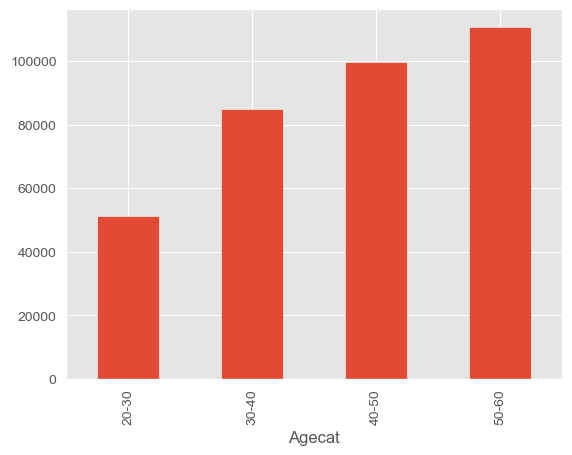

In [30]:
# Calculating avg salary by age group
round(df.groupby('Agecat')['Salary'].mean(),2).plot(kind ='bar')
round(df.groupby('Agecat')['Salary'].mean(),2)

Department
Finance      80295.195122
HR           73421.937500
IT           80274.894737
Marketing    75361.952381
Sales        73757.361702
Name: Salary, dtype: float64 

Position
Analyst              68195.696970
Intern               34811.500000
Junior Developer     52104.114286
Manager             110091.475000
Senior Developer     86481.500000
Team Lead           100228.062500
Name: Salary, dtype: float64


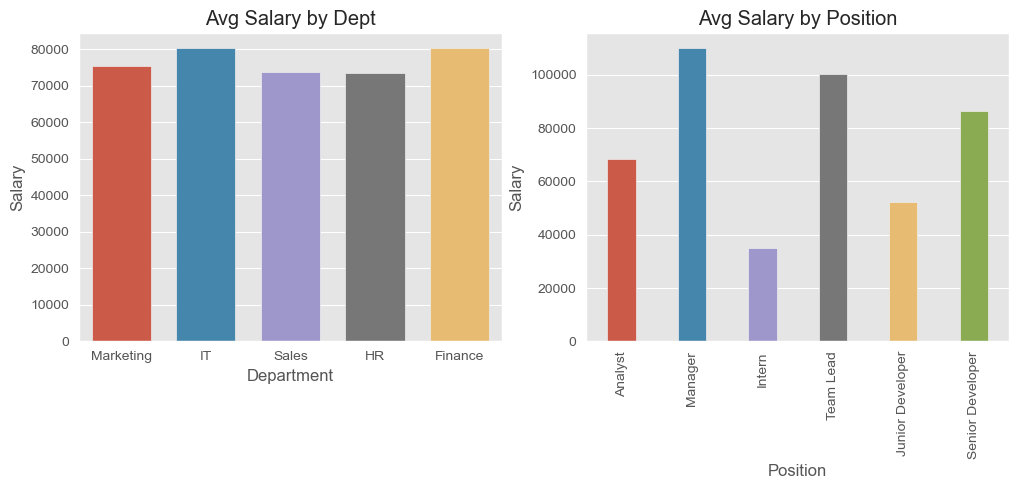

In [31]:
# Dept. vs Avg Salary
# Postion vs Avg. Salary
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Department, y=df.Salary, ci=0, width =0.7)
plt.title('Avg Salary by Dept')
plt.subplot(1,2,2)
sns.barplot(x=df.Position, y=df.Salary, ci=0, width =0.4)
plt.title('Avg Salary by Position')
plt.xticks(rotation =90)
print(df.groupby("Department")['Salary'].mean(),"\n")
print(df.groupby("Position")['Salary'].mean())
plt.show()

***IT & Finance Dept. enjoy the highest avg salary in the organization***

***The salary of all Managers is the highest than any other position in the organization***

In [32]:
# Lets find the Employee with Highest Salary
df.Salary.max()

119895

In [33]:
df[df.Salary == df.Salary.max()].transpose()

,27
Name,Susan Johnson
Age,35
Gender,Male
Projects Completed,17
Productivity (%),26
Satisfaction Rate (%),81
Feedback Score,3.9
Department,Finance
Position,Manager
Salary,119895


Susan Johnson, Manager in Finance Dept. with 13 Years of Experience takes home the highest salary in the organization viz. 1,19,895

In [34]:
df[df.Salary == df.Salary.min()]

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Year,Agecat
120,Michael Rodriguez,26,Female,5,11,67,3.6,HR,Intern,30231,2,20-30


Michael Rodriguez, Intern in HR Dept. with 2 Years of Experience takes home the lowest salary in the organization viz. 30,231.

In [35]:
# Whats the salary of the employee with highest experience

In [36]:
df.Year.max()

26

In [37]:
df[df.Year==df.Year.max()]

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Year,Agecat
83,Calvin Mullen,49,Female,24,76,87,3.1,Marketing,Manager,107320,26,40-50


Calvin Mullen,49 years, Manager in Marketing Dept. with 26 Years of Experience is the most experienced personnal and takes home a salary of 1,07,320.

In [38]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,Year,Agecat
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,63596,4,20-30
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,112540,25,50-60
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,66292,7,30-40
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,38303,2,20-30
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,101133,19,40-50


<Axes: >

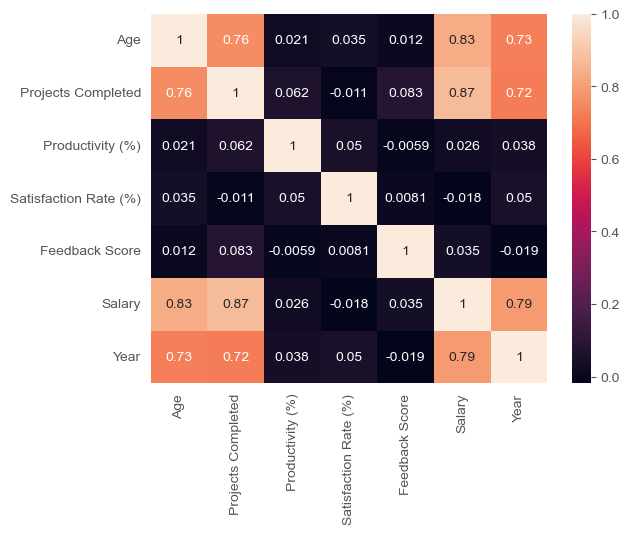

In [39]:
# Plot a heatmap of all numerical columns and give conclusion
corr = df.select_dtypes(exclude = 'object').corr()
sns.heatmap(corr, annot = True)

Observations:
    
    1. A correlation coeff of 0.87 shows a strong positive trend b/w No. of Projects Completed and Salary of employee.
    2. A correlation coeff of 0.83 shows a strong positive trend b/w Age and Salary of employee.
    3. A correlation coeff of 0.79 shows a positive trend b/w Years of Experience and Salary of employee.
    
    4. Satisfaction rate, Productivity Score and  Feedback Score have correlation coeff ~ 0.

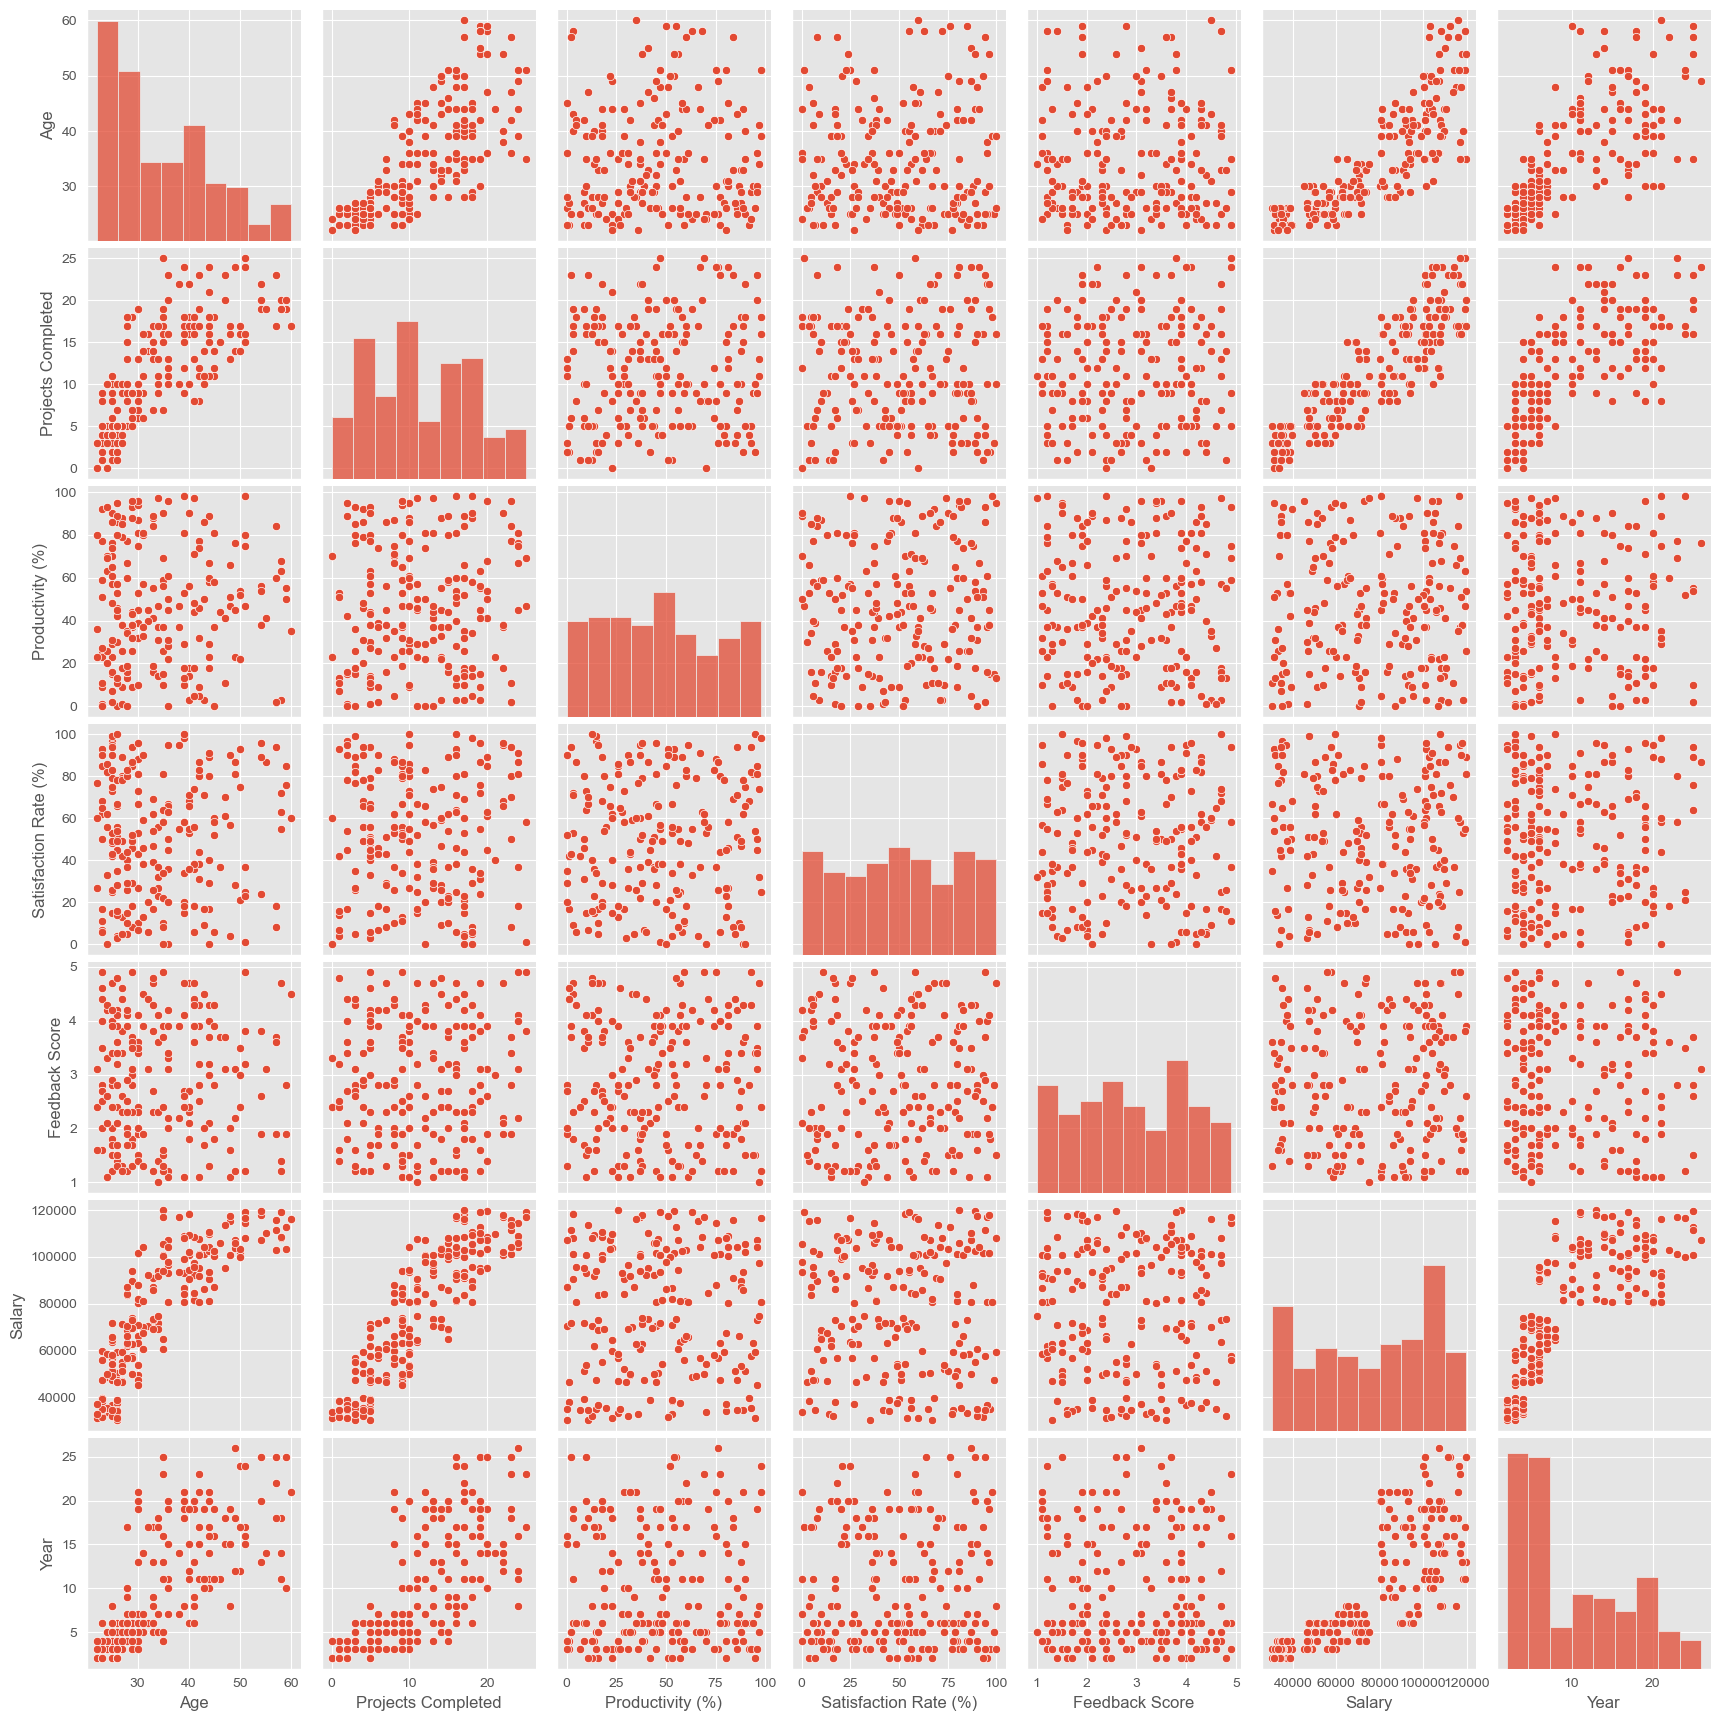

In [40]:
sns.pairplot(df)

The pair plot above further solidifes our claim. Satisfaction rate, Productivity Score and  Feedback Score have no correlation amongst themselves, or with any other numerical coumns as Age, Salary,Years of Expereince and Projects Completed.

# -------------------------------------End of Report------------------------------------------------------